In [1]:
import os
import sys

sys.path.append("../")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from natsort import natsorted

from src.data.DataList import dataset_dict, dist_colors

from sklearn.model_selection import train_test_split

In [2]:
BASE = "/NFS/Users/moonsh/data/FLData/"
phenoPATH = BASE + "Phenotype"

oasis_3_Hc = pd.read_csv(BASE + "health_subjects_CDRTOT0.csv")
hc_oas3 = oasis_3_Hc["OASISID"].unique()

In [3]:
total_list = [csv for csv in os.listdir(phenoPATH) if csv.endswith("total.csv") and csv.split("_")[0] in dataset_dict.keys()]
# train_list = [csv for csv in os.listdir(phenoPATH) if csv.endswith("train.csv") and csv.split("_")[0] in dataset_dict.keys()]
# test_list = [csv for csv in os.listdir(phenoPATH) if csv.endswith("test.csv") and csv.split("_")[0] in dataset_dict.keys()]
# val_list = [csv for csv in os.listdir(phenoPATH) if csv.endswith("val.csv") and csv.split("_")[0] in dataset_dict.keys()]

In [4]:
df_list = []
for i in range(10):    
    dataset_name = total_list[i].split("_")[0]
    
    img_list = os.listdir(os.path.join(BASE, "Image", dataset_name))
    total_df = pd.read_csv(phenoPATH + "/" + total_list[i])
    # total_df = pd.read_csv(phenoPATH + "/" + total_list[i])
    subject_list = total_df["Subject"].values

    use_subject_list = []
    imgfile_list = []
    for subject in subject_list:
        if dataset_name == "OAS3":
            if subject not in hc_oas3:
                continue
        for imgfile in img_list:
            if str(subject) in imgfile:
                use_subject_list.append(subject)
                imgfile_list.append(imgfile)
                break

    total_df = total_df[total_df["Subject"].isin(use_subject_list)]
    total_df = total_df.reset_index(drop=True)
    total_df["ImageFile"] = imgfile_list
    df_list.append(total_df)
    # total_df.to_csv(phenoPATH + "/" + dataset_name + "_Phenotype_total.csv", index=False)

CamCAN 520 66 65
OAS3 641 81 80
SALD 395 50 49
DLBS 248 31 31
HCP 759 95 94
SLIM 453 57 56
UCLA-CNP 88 11 11
DecNef 403 51 50
ADNI 809 102 100
IXI 448 56 56


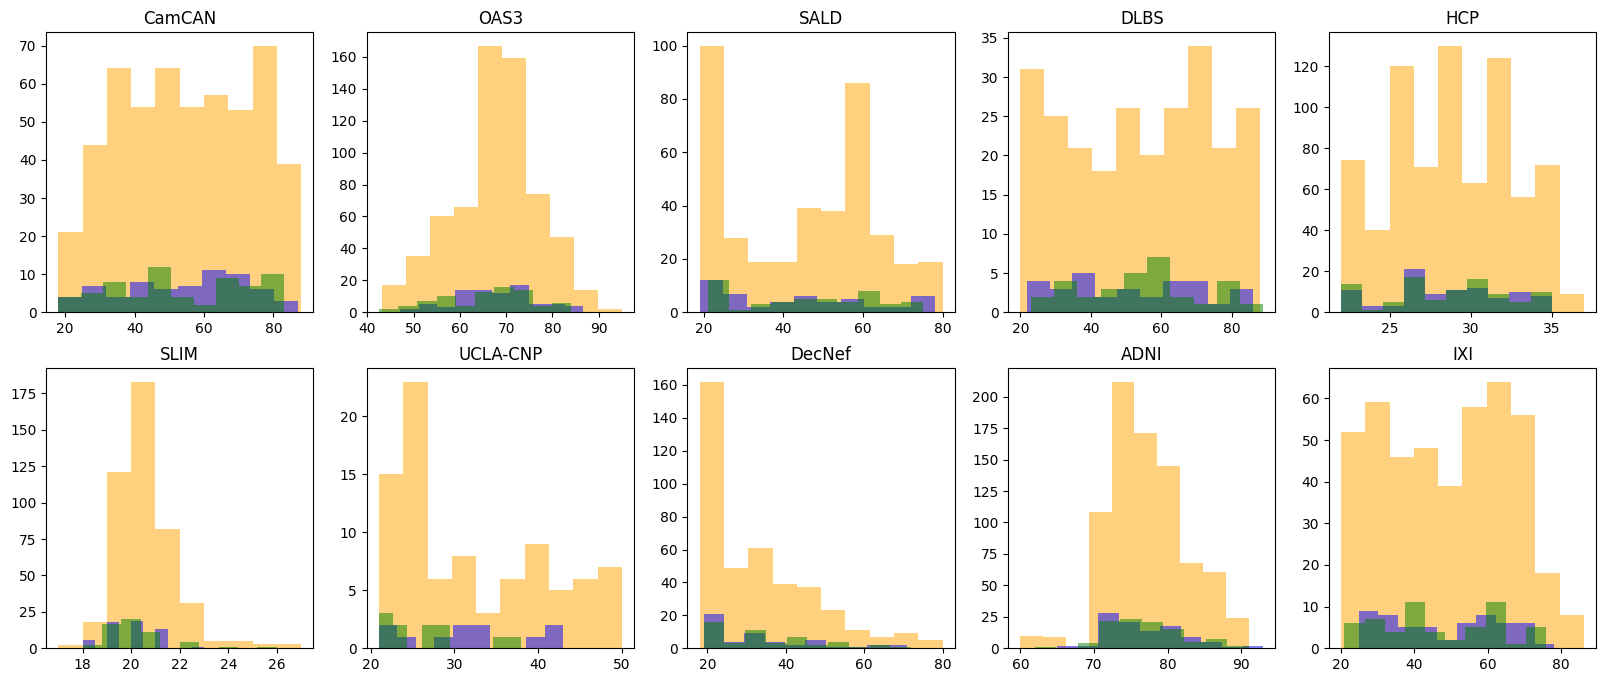

In [5]:
color = dist_colors
fig, axs = plt.subplots(2,5 , figsize=(20, 8))

for i in range(10):
    ax = axs[i // 5, i % 5]
    
    dataset_name = total_list[i].split("_")[0]
    # print(dataset_name)
    total_df = pd.read_csv(phenoPATH + "/" + total_list[i])

    train_df, test_df = train_test_split(total_df, test_size=0.10, random_state=12)
    train_df, val_df = train_test_split(train_df, test_size=0.11, random_state=12)

    print(dataset_name, len(train_df), len(test_df), len(val_df))

    ax.hist(train_df["Age"], bins=10, alpha=0.5, color='orange', label="Train")
    ax.hist(test_df["Age"], bins=10, alpha=0.5, color='blue', label="Test")
    ax.hist(val_df["Age"], bins=10, alpha=0.5, color='green', label="Val")
    ax.set_title(dataset_name)
 
    # print(round(len(train_df) / len(total_df), 2), round(len(test_df) / len(total_df), 2), round(len(val_df) / len(total_df), 2))

    # train_df.to_csv(phenoPATH + "/" + dataset_name + "_Phenotype_train.csv", index=False)
    # test_df.to_csv(phenoPATH + "/" + dataset_name + "_Phenotype_test.csv", index=False)
    # val_df.to_csv(phenoPATH + "/" + dataset_name + "_Phenotype_val.csv", index=False)

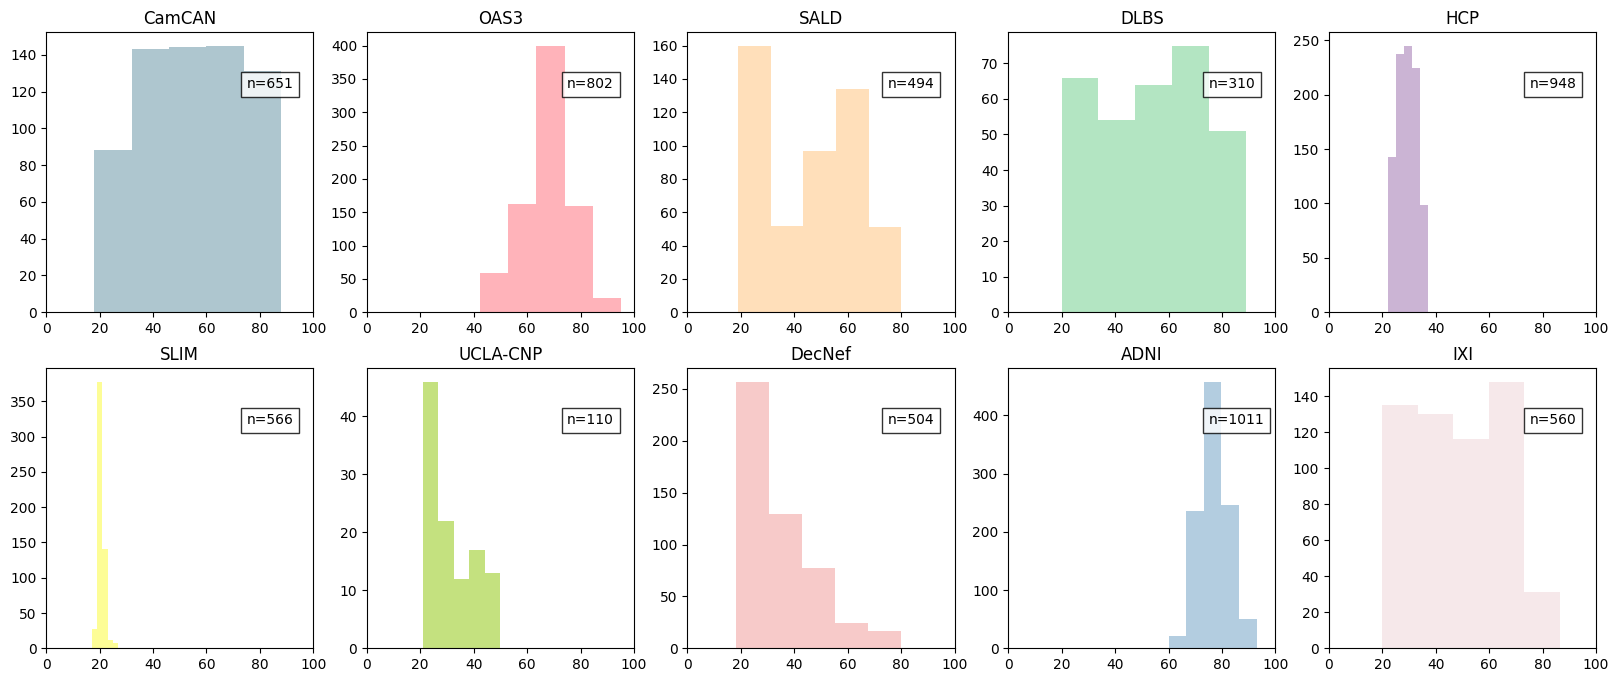

In [6]:
color = dist_colors
fig, axs = plt.subplots(2,5 , figsize=(20, 8))

for i, csvPATH in enumerate(total_list):
    ax = axs[i//5, i%5]
    csv = pd.read_csv(phenoPATH + "/" + csvPATH)
    if csvPATH.split("_")[0] == "SLIM":
        ax.hist(csv["Age"], bins=5, alpha=1, label=csvPATH.split("_")[0], color=color[i])
    else:
        ax.hist(csv["Age"], bins=5, alpha=1, label=csvPATH.split("_")[0], color=color[i])
    ax.set_title(csvPATH.split("_")[0])
    ax.set_xlim(0, 100)
    ax.text(0.75, 0.8, f"n={len(csv)}", transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.show()